In [1]:
from math import comb
import matplotlib.pyplot as plt
import numpy as np

def count_good_binary_strings(N):
    kcounter = 0
    if N < 2:
        raise ValueError("N must be >= 2")
    # Criterion 1: All zeros
    count_criterion1 = 1  # Only one string: '000...0'
    kcounter +=1
    
    # Criterion 2: Single "1" in the second position
    count_criterion2 = 1 if N > 1 else 0  # Only one string: '010...0'
    kcounter +=1

    # Criterion 3: Strings satisfying k ones (2 <= k <= (N+1)/2)
    count_criterion3 = 0
    for k in range(2, round((N + 1) / 2)+1):  # k ranges from 2 to floor((N+1)/2)
        #print("k=", k)
        remaining_positions = N - (k)  # Positions after the mandatory part
        if remaining_positions >= k - 1:  # Ensure enough places for the remaining ones
            #print(comb(remaining_positions, k - 1))
            count_criterion3 += comb(remaining_positions, k - 1)
            kcounter += comb(remaining_positions, k - 1)*k
    
    # Total count
    total_count = count_criterion1 + count_criterion2 + count_criterion3
    return total_count, kcounter/(total_count*N)

In [2]:
x=np.zeros(7)
x[1] += 1
print(x)

[0. 1. 0. 0. 0. 0. 0.]


In [4]:
count_good_binary_strings(6)[1]

0.35185185185185186

In [5]:
1-0.35185185185185186

0.6481481481481481

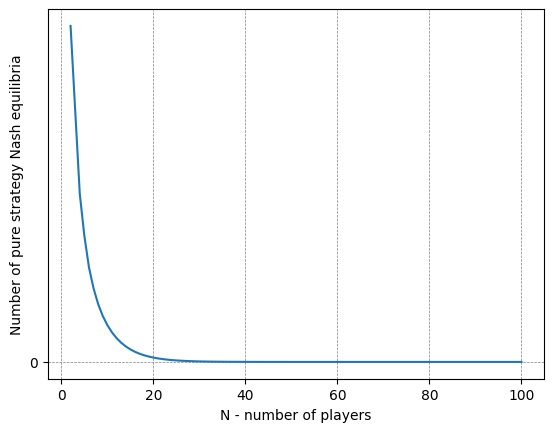

In [5]:
plt.yticks(np.arange(0, 60, 5))
plt.xlabel("N - number of players")
plt.ylabel("Number of pure strategy Nash equilibria")
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.plot(np.arange(2,101), [count_good_binary_strings(i)[0]/2**(i) for i in range(2,101)])

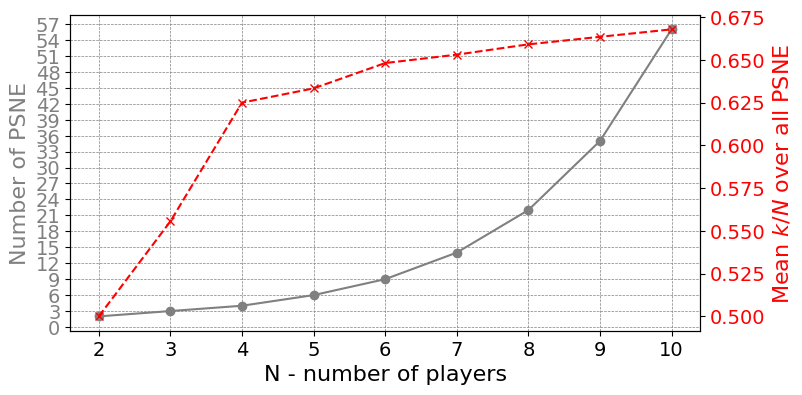

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
N_values = np.arange(2, 11)  # X-axis data
primary_y_data = [count_good_binary_strings(i)[0] for i in N_values]  # Primary y-axis data
secondary_y_data = [1-count_good_binary_strings(i)[1] for i in N_values]  # Secondary y-axis data (example: exponential growth)

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 4))  # Primary axis

# Plot primary y-axis data
ax1.plot(N_values, primary_y_data, label="Primary Data", color="gray", marker="o")
ax1.set_xlabel("N - number of players", fontsize=16)
ax1.set_ylabel("Number of PSNE", color="gray", fontsize=16)
ax1.tick_params(axis='y', labelcolor="gray")
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_yticks(np.arange(0, 60, 3))

# Create secondary y-axis
ax2 = ax1.twinx()  # Secondary axis sharing the same x-axis
ax2.plot(N_values, secondary_y_data, label="Secondary Data", color="red", linestyle="--", marker="x")
ax2.set_ylabel(r"Mean $k/N$ over all PSNE ", color="red", fontsize=16)
ax2.tick_params(axis='y', labelcolor="red")
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)

# Title and legend
#plt.title("Plot with Primary and Secondary Y-Axes")
fig.tight_layout()  # Adjust layout to fit both axes
plt.savefig("graph1.pdf")

# Show plot
plt.show()

C:\Users\bgasp\AppData\Local\Temp\ipykernel_24040\2081291530.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  primary_y_data_2 = [count_good_binary_strings(i)[0]/2**(i) for i in N_values_2]  # Primary y-axis data


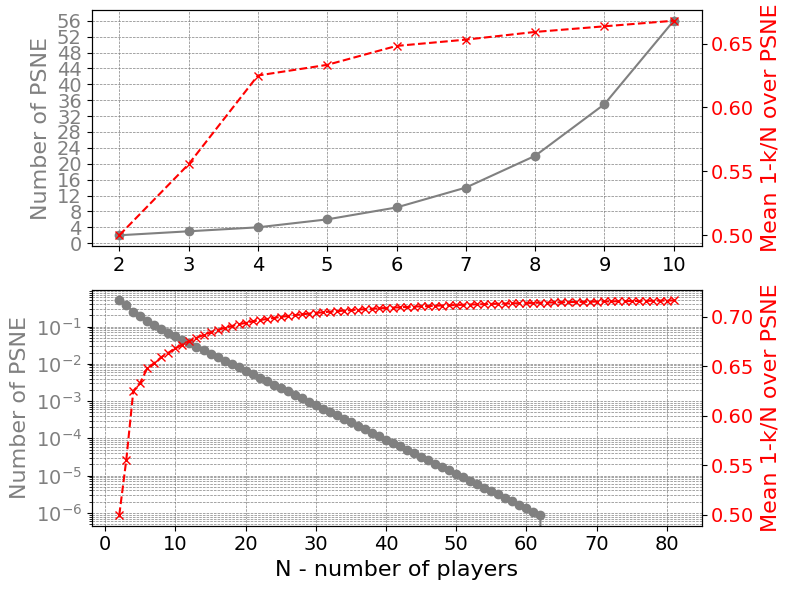

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the first graph
N_values_1 = np.arange(2, 11)  # X-axis data for the first graph
primary_y_data_1 = [count_good_binary_strings(i)[0] for i in N_values_1]  # Primary y-axis data
secondary_y_data_1 = [1 - count_good_binary_strings(i)[1] for i in N_values_1]  # Secondary y-axis data

# Sample data for the second graph
N_values_2 = np.arange(2, 82)  # X-axis data for the second graph
primary_y_data_2 = [count_good_binary_strings(i)[0]/2**(i) for i in N_values_2]  # Primary y-axis data
secondary_y_data_2 = [1 - count_good_binary_strings(i)[1] for i in N_values_2]  # Secondary y-axis data

# Create the figure with two subplots (top and bottom)
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(8, 6))  # Two rows, one column

# First graph (top plot)
ax1.plot(N_values_1, primary_y_data_1, label="Primary Data", color="gray", marker="o")
#ax1.set_xlabel("N - number of players", fontsize=16)
ax1.set_ylabel("Number of PSNE", color="gray", fontsize=16)
ax1.set_yticks(np.arange(0, 60, 4))
ax1.tick_params(axis='y', labelcolor="gray")
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)

# Create secondary y-axis for the first graph
ax2 = ax1.twinx()  # Secondary axis sharing the same x-axis
ax2.plot(N_values_1, secondary_y_data_1, label="Secondary Data", color="red", linestyle="--", marker="x")
ax2.set_ylabel(r"Mean 1-k/N over PSNE", color="red", fontsize=16)
ax2.tick_params(axis='y', labelcolor="red")
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)

# Second graph (bottom plot)
ax3.set_yscale('log')
ax3.plot(N_values_2, primary_y_data_2, label="Primary Data", color="gray", marker="o")
ax3.set_xlabel("N - number of players", fontsize=16)
ax3.set_ylabel("Number of PSNE", color="gray", fontsize=16)
ax3.tick_params(axis='y', labelcolor="gray")
ax3.grid(visible=True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='minor', labelsize=14)

# Create secondary y-axis for the second graph
ax4 = ax3.twinx()  # Secondary axis sharing the same x-axis
ax4.plot(N_values_2, secondary_y_data_2, label="Secondary Data", color="red", linestyle="--", marker="x")
ax4.set_ylabel(r"Mean 1-k/N over PSNE", color="red", fontsize=16)
ax4.tick_params(axis='y', labelcolor="red")
ax4.tick_params(axis='both', which='major', labelsize=14)
ax4.tick_params(axis='both', which='minor', labelsize=14)

# Adjust layout to fit both graphs
fig.tight_layout()

# Save the plot as a PDF
plt.savefig("graph1.pdf")

# Show the plot
plt.show()
